In [1]:
import numpy as np

In [5]:
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\Angelique\Downloads\Consumo_cerveja.csv")
df.head()

Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27,3                   23,9   
1  2015-01-02                 27,02                   24,5   
2  2015-01-03                 24,82                   22,4   
3  2015-01-04                 23,98                   21,5   
4  2015-01-05                 23,82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32,5                 0              0.0   
1                   33,5                 0              0.0   
2                   29,9                 0              1.0   
3                   28,6               1,2              1.0   
4                   28,3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [11]:
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [13]:
#.shape is for how many columns or rows we have
df.shape

(941, 7)

In [17]:
#.describe is for the 5 q thing
df.describe()

Final de Semana  Consumo de cerveja (litros)
count       365.000000                   365.000000
mean          0.284932                    25.401367
std           0.452001                     4.399143
min           0.000000                    14.343000
25%           0.000000                    22.008000
50%           0.000000                    24.867000
75%           1.000000                    28.631000
max           1.000000                    37.937000

In [37]:
#for null values
df.isnull().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

In [43]:
#Dropping null values 
df.dropna(how = 'all', inplace = True)

In [53]:
df.head()

Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27.3                   23.9   
1  2015-01-02                 27.02                   24.5   
2  2015-01-03                 24.82                   22.4   
3  2015-01-04                 23.98                   21.5   
4  2015-01-05                 23.82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32.5                 0              0.0   
1                   33.5                 0              0.0   
2                   29.9                 0              1.0   
3                   28.6               1.2              1.0   
4                   28.3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [47]:
#Replacing commas with period (for the string values)
df.replace({',': '.'}, regex = True, inplace = True)

In [51]:
df.head()

Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27.3                   23.9   
1  2015-01-02                 27.02                   24.5   
2  2015-01-03                 24.82                   22.4   
3  2015-01-04                 23.98                   21.5   
4  2015-01-05                 23.82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32.5                 0              0.0   
1                   33.5                 0              0.0   
2                   29.9                 0              1.0   
3                   28.6               1.2              1.0   
4                   28.3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [56]:
#changing/converting out data column to date 
df['Data']= pd.to_datetime(df['Data'])


In [58]:
df.info()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    object        
 2   Temperatura Minima (C)       365 non-null    object        
 3   Temperatura Maxima (C)       365 non-null    object        
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [64]:
df['Day'] = df['Data'].apply(lambda a: days[a.weekday()])

In [66]:
df.head()

Data Temperatura Media (C) Temperatura Minima (C)  \
0 2015-01-01                  27.3                   23.9   
1 2015-01-02                 27.02                   24.5   
2 2015-01-03                 24.82                   22.4   
3 2015-01-04                 23.98                   21.5   
4 2015-01-05                 23.82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32.5                 0              0.0   
1                   33.5                 0              0.0   
2                   29.9                 0              1.0   
3                   28.6               1.2              1.0   
4                   28.3                 0              0.0   

   Consumo de cerveja (litros)       Day  
0                       25.461  Thursday  
1                       28.972    Friday  
2                       30.814  Saturday  
3                       29.799    Sunday  
4                       28.900    Monday

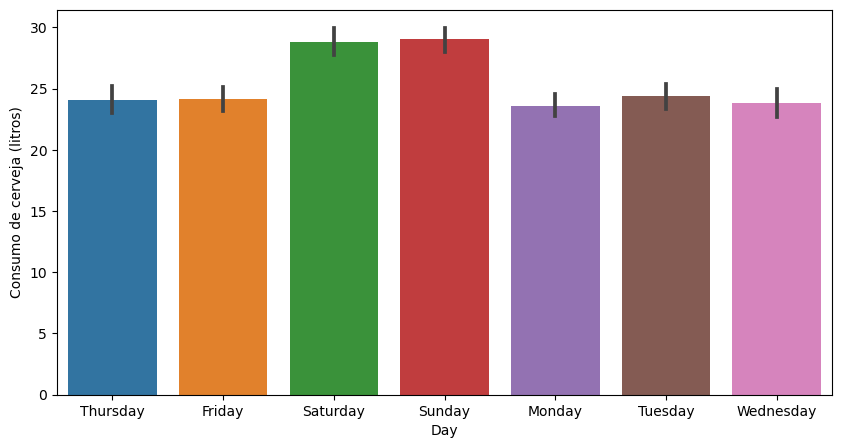

In [72]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Day', y="Consumo de cerveja (litros)", data=df)

In [74]:
df.drop(['Data', 'Day'], axis = 1, inplace= True)

In [76]:
# Converting temperature and rainfall columns into float type
df = df.apply(pd.to_numeric)
df

Temperatura Media (C)  Temperatura Minima (C)  Temperatura Maxima (C)  \
0                    27.30                    23.9                    32.5   
1                    27.02                    24.5                    33.5   
2                    24.82                    22.4                    29.9   
3                    23.98                    21.5                    28.6   
4                    23.82                    21.0                    28.3   
..                     ...                     ...                     ...   
360                  24.00                    21.1                    28.2   
361                  22.64                    21.1                    26.7   
362                  21.68                    20.3                    24.1   
363                  21.38                    19.3                    22.4   
364                  24.76                    20.2                    29.0   

     Precipitacao (mm)  Final de Semana  Consumo de cerveja (litros)  
0                  0.0              0.0                       25.461  
1                  0.0              0.0                       28.972  
2                  0.0              1.0                       30.814  
3                  1.2              1.0                       29.799  
4                  0.0              0.0                       28.900  
..                 ...              ...                          ...  
360               13.6              1.0                       32.307  
361                0.0              0.0                       26.095  
362               10.3              0.0                       22.309  
363                6.3              0.0                       20.467  
364                0.0              0.0                       22.446  

[365 rows x 6 columns]

In [83]:
# dividing our data into testing and training parts
import sklearn as sk

from sklearn.model_selection import train_test_split
x = df.drop('Consumo de cerveja (litros)', axis = 1) # dropping the target variable


In [85]:
y = df['Consumo de cerveja (litros)']

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state =42)

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [91]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [93]:
y_pred = lr.predict(xtrain)


In [97]:
y_pred

array([24.24844816, 20.22095499, 17.17067546, 22.46145826, 26.28212449,
       30.46490952, 35.5485243 , 24.85610412, 24.51563238, 26.1741828 ,
       25.102742  , 22.93702099, 24.16827309, 30.93242696, 22.30389391,
       22.90140103, 25.67036163, 26.39865023, 25.89366779, 23.25810009,
       35.33285043, 18.87134762, 24.51084801, 23.04072403, 35.27653628,
       20.66402878, 31.70506282, 27.38315598, 26.13899869, 27.98535187,
       20.97388463, 21.91550739, 24.12790426, 24.13921524, 29.75233635,
       22.30218795, 22.88249731, 26.87194004, 19.41459605, 29.08182049,
       30.05360318, 21.70906898, 27.7377832 , 21.11017699, 30.57644535,
       29.21371855, 24.65553494, 30.20710969, 21.4815218 , 30.26348296,
       22.54809288, 24.65048741, 20.0467648 , 26.65337116, 25.24998327,
       20.89441217, 22.900667  , 23.43295248, 28.93193864, 20.68677579,
       22.87666695, 28.76487426, 26.06758663, 20.75409836, 34.63798735,
       23.8694938 , 25.52161714, 21.12528243, 23.28887073, 22.73

In [103]:
ytest

193    25.640
33     31.655
15     29.938
309    20.575
57     26.241
        ...  
203    19.029
82     21.617
94     32.713
192    33.298
325    31.933
Name: Consumo de cerveja (litros), Length: 73, dtype: float64

In [105]:
print (lr.score(xtest,ytest))

0.7427938181737361
